# Coleta de dados

Nesta seção vamos coletar as fontes de dados necessários. Serão usadas duas tabelas mais os dados de legendas, cujas funções de coleta são definidas aqui.

## Datasets

O dataset principal que será utilizado é o Kanji Database. Abaixo, é feita sua importação, e é possível ver todas as colunas e as 5 primeiras linhas.

In [ ]:
import pandas as pd
kanji_database = pd.read_csv('https://raw.githubusercontent.com/laiscarraro/Kanji-study/main/kanji_database.csv', sep=';')
kanji_database

,id,Kanji,Strokes,Grade,Kanji Classification,JLPT-test,Name of Radical,Radical Freq.,Reading within Joyo,Reading beyond Joyo,# of On,On within Joyo,Kanji ID in Nelson,# of Meanings of On,Translation of On,# of Kun within Joyo with inflections,# of Kun within Joyo without inflections,Kun within Joyo,# of Meanings of Kun,Translation of Kun,Year of Inclusion,Kanji Frequency with Proper Nouns,Acc. Freq. On with Proper Nouns,Acc. Freq. Kun with Proper Nouns,On Ratio with Proper Nouns,Acc. Freq. On beyond Joyo with Proper Nouns,Acc. Freq. Kun beyond Joyo with Proper Nouns,Acc. On Ratio beyond Joyo with Proper Nouns,Kanji Frequency without Proper Nouns,Acc. Freq. On without Proper Nouns,Acc. Freq. Kun without Proper Nouns,On Ratio without Proper Nouns,Acc. Freq. On beyond Joyo without Proper Nouns,Acc. Freq. Kun beyond Joyo without Proper Nouns,On Ratio beyond Joyo without Proper Nouns,Left Kanji Prod.,Right Kanji Prod.,Acc. Freq. Left Prod.,Acc. Freq. Right Prod.,Symmetry,Left Entropy,Right Entropy,Left1sound,Left1freq,Left2sound,Left2freq,Left3sound,Left3freq,Left4sound,Left4freq,Left5sound,Left5freq,Left6sound,Left6freq,Right1sound,Right1freq,Right2sound,Right2freq,Right3sound,Right3freq,Right4sound,Right4freq,Right5sound,Right5freq,Right6sound,Right6freq,Right7sound,Right7freq
0,1,亜,7,7,象形 Pictographic,1,Ni,6,ア,NaN,1,a,81,5,"rank next, come after, Asia, sub-, -ous (in ac...",0,0,-,0,-,1981,13829,13493,0,1.000,0,0,1.000,1457,1392,0,1.000,0,0,1.000,2,6,559,519,S,0.596933,1.289550,a,519,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,a,559,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,2,哀,9,7,会意 Com. Ideographic,1,"Kuchi, Kuchihen",70,アイ、あわ-れ、あわ-れむ,かな,1,ai,791,3,"pity, have mercy on, sympathize with",2,1,"awa(re), awa(remu)",8,"pity, have mercy on, sympathize with, grief, s...",1981,4792,3283,590,0.848,0,241,0.798,4651,3147,590,0.842,0,241,0.791,1,16,507,2215,R,0.000000,2.595608,ai,2,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,ai,507,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,3,挨,10,7,形声 Phonetic,0,Tehen,89,アイ,NaN,1,ai,2160,1,push open,0,0,-,0,-,2010,324,315,0,1.000,0,0,1.000,324,315,0,1.000,0,0,1.000,0,1,0,315,.,0.000000,0.000000,ai,315,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
3,4,愛,13,4,会意 Com. Ideographic,3,"Kokoro, Risshinben, Shitagokoro",76,アイ,オ、いと、め,1,ai,1927,3,"love, affection, favorite",0,0,-,0,-,1981,94602,81703,0,1.000,239,523,0.994,50443,47307,0,1.000,0,412,0.991,24,40,7447,16515,R,2.950856,4.011430,ai,16,ito,234,NaN,0,NaN,0,NaN,0,NaN,0,ai,7,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,5,曖,17,7,形声 Phonetic,0,"Nichi, Nichihen",38,アイ,NaN,1,ai,2521,2,dark; not clear,0,0,-,0,-,2010,214,205,0,1.000,0,0,1.000,214,205,0,1.000,0,0,1.000,0,1,0,205,.,0.000000,0.000000,ai,205,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,2132,脇,10,7,形声 Phonetic,0,"Niku, Nikuzuki",44,わき,キョウ,0,-,4807,6,"the other way; another place; side, armpit, fl...",1,1,waki,6,"the other way; another place; side, armpit, fl...",2010,15177,0,12403,0.000,24,0,0.002,8176,0,5452,0.000,24,0,0.004,3,10,2723,1364,S,0.112727,1.839262,waki,1,kyoo,24,NaN,0,NaN,0,NaN,0,NaN,0,waki,26,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2132,2133,惑,12,7,形声 Phonetic,1,"Kokoro, Risshinben, Shitagokoro",76,ワク、まど-う,NaN,1,waku,1892,9,"be perplexed, be in doubt, hesitate, vacillate...",1,1,mado(u),9,"be perplexed, be in doubt, hesitate, vacillate...",1981,41571,36064,5342,0.871,0,0,0.871,41571,36064,5342,0.871,0,0,0.871,12,3,33442,1643,P,2.054335,0.054061,waku,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,waku,33,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2133,2134,枠,8,7,国字 Original,1,"Ki, Kihen",85,わく,NaN,0,-,2585,0,-,1,1,waku,8,"frame, framework; reel, spindle, spool; rim, b...",1981,34922,0,34922,0.000,0,0,0.000,34922,0,34922,0.000,0,0

Como analisaremos algumas ordens de aprendizado de Kanji, importaremos também o conjunto de dados abaixo, que traz a ordem de Heisig, uma ordem famosa de Kanji apresentada no livro *Remembering the Kanji*. É importante notar que o conjunto de dados apresenta mais linhas do que o Kanji Database porque a ordem de Heisig inclui também alguns *radicais* separados. Radicais são partes de Kanjis que precisam se juntar com outros radicais para criar um Kanji completo. Alguns radicais formam, sozinhos, Kanjis completos, mas existem aqueles que precisam necessariamente se juntar com outros (e isso explica o número maior de linhas).

In [ ]:
heisig_order = pd.read_csv('https://raw.githubusercontent.com/laiscarraro/Kanji-study/main/heisig_order.csv')
heisig_order

,Kanji,Heisig_order
0,一,1
1,二,2
2,三,3
3,四,4
4,五,5
...,...,...
2195,丹,2196
2196,丑,2197
2197,羞,2198
2198,卯,2199


Como a ordem de Heisig é baseada primariamente em radicais, será útil ter datasets que focam nestes radicais. Abaixo, temos uma base de dados com informações específicas sobre os radicais, como número de traços, significado, leituras, etc.

In [ ]:
radicals = pd.read_csv('https://raw.githubusercontent.com/kanjialive/kanji-data-media/master/language-data/japanese-radicals.csv')
radicals

,Radical ID#,Stroke#,Radical,Meaning,Reading-J,Reading-R,R-Filename,Anim-Filename,Position-J,Position-R
0,1,1.0,⼀,"one, horizontal stroke",いち,ichi,NaN,NaN,NaN,NaN
1,2,1.0,⼁,vertical stroke,たてぼう,tatebou,NaN,NaN,NaN,NaN
2,3,1.0,⼂,dot,てん,ten,NaN,NaN,NaN,NaN
3,4,1.0,⼃,diagonal sweeping stroke,の,no,NaN,NaN,NaN,NaN
4,5,1.0,,diagonal sweeping stroke,のかんむり,nokanmuri,NaN,NaN,かんむり,kanmuri
...,...,...,...,...,...,...,...,...,...,...
317,318,15.0,⿒,tooth,は,ha,NaN,NaN,NaN,NaN
318,319,16.0,⿓,dragon,りゅう,ryuu,NaN,NaN,NaN,NaN
319,320,16.0,⿔,turtle,かめ,kame,NaN,NaN,NaN,NaN
320,321,17.0,⿕,flute,やく,yaku,NaN,NaN,NaN,NaN


Por fim, a base de dados a seguir relaciona os Kanjis com seu radical principal, além de trazer algumas informações a mais sobre o Kanji (como nome, ano escolar em que é ensinado nas escolas, leituras) e sobre o radical (número de traços, posição, etc). Um detalhe é que a base não contempla todos os Kanji, apenas um pouco mais da metade deles.

In [ ]:
kanji_radicals = pd.read_csv('https://raw.githubusercontent.com/kanjialive/kanji-data-media/master/language-data/ka_data.csv')
kanji_radicals

,kanji,kname,kstroke,kmeaning,kgrade,kunyomi_ja,kunyomi,onyomi_ja,onyomi,examples,radical,rad_order,rad_stroke,rad_name_ja,rad_name,rad_meaning,rad_position_ja,rad_position
0,一,1,1,one,1.0,ひと,hito,イチ,ichi,"[ [ ""一年生（いちねんせい）"", ""first-year student"" ], [ ""...",⼀,1.0,1,いち,ichi,"one, horizontal stroke",NaN,NaN
1,何,nani,7,"what, how many",2.0,なに、なん,"nani, nan",カ,ka,"[ [ ""幾何学（きかがく）"", ""geometry"" ], [ ""何（なに）"", ""wha...",⺅,11.0,2,にんべん,ninben,person,へん,hen
2,七,7,2,seven,1.0,なな、なの、ななつ,"nana, nano, nanatsu",シチ,shichi,"[ [ ""七時（しちじ）"", ""7 o'clock"" ], [ ""十七（じゅうしち/じゅうな...",⼀,1.0,1,いち,ichi,"one, horizontal stroke",NaN,NaN
3,飼,shi-ka(u),13,raise animals,5.0,か、かう,"ka, kau",シ,shi,"[ [ ""飼料（しりょう）"", ""fodder, feed"" ], [ ""飼育する（しいくす...",⻟,221.0,8,しょくへん,shokuhen,"food, to eat",へん,hen
4,示,ji-shime(su),5,show,5.0,しめ、しめす,"shime, shimesu",シ、ジ,"shi, ji","[ [ ""示唆する（しさする）"", ""suggest, give a hint"" ], [ ...",⽰,144.0,5,しめす,shimesu,"altar, festival, religious service",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,酸,san-sui,14,"acid, oxygen",5.0,す、すい,"su, sui",サン,san,"[ [ ""酸（さん）"", ""acid"" ], [ ""酸素（さんそ）"", ""oxygen"" ]...",,199.0,7,とりへん,torihen,"sake jar, bird",へん,hen
1231,志,kokoroza(su),7,"ambition, will, intention, aim",5.0,こころざ、こころざす、こころざし,"kokoroza, kokorozasu, kokorozashi",シ,shi,"[ [ ""意志（いし）"", ""will, volition"" ], [ ""大志（たいし）"",...",⼼,80.0,4,こころ,kokoro,"heart, mind, spirit",NaN,NaN
1232,師,(kyou)shi,10,"master, teacher",5.0,NaN,NaN,シ,shi,"[ [ ""師（し）"", ""teacher, master, mentor"" ], [ ""師範...",⼱,59.0,3,はば,haba,cloth,NaN,NaN
1233,枝,eda,8,branch,5.0,えだ,eda,シ,shi,"[ [ ""枝葉末節（しようまっせつ）"", ""inessentials"" ], [ ""枝垂れ桜...",,98.0,4,きへん,kihen,"tree, wood",へん,hen


## Base de legendas de animes

Agora vamos prosseguir para a importação de dados de legendas de animes. Abaixo, criamos um dataframe com todos os nomes de animes disponíveis e seu respectivo caminho dentro do site utilizado (kitsunekko.net).

In [ ]:
#@title Nomes de animes disponíveis

import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

page = requests.get('https://kitsunekko.net/dirlist.php?dir=subtitles%2Fjapanese%2F')
soup = BeautifulSoup(page.text, 'html.parser')
animes = pd.DataFrame([(re.sub('</?strong>', '', str(i.contents[0]).lower()), i['href']) for i in soup.find_all('a') if '<strong>' in str(i)], columns=['name', 'path'])
animes

,name,path
0,.hack g.u,/dirlist.php?dir=subtitles%2Fjapanese%2F.hack+...
1,3-gatsu no lion,/dirlist.php?dir=subtitles%2Fjapanese%2F3-gats...
2,5-tou ni naritai,/dirlist.php?dir=subtitles%2Fjapanese%2F5-tou+...
3,07-ghost,/dirlist.php?dir=subtitles%2Fjapanese%2F07-Gho...
4,7seeds,/dirlist.php?dir=subtitles%2Fjapanese%2F7SEEDS%2F
...,...,...
1948,anyme lyrics (lrc).zip,subtitles/japanese/Anyme lyrics (lrc).zip
1949,caption2ass pcr with gaiji list updated.rar,subtitles/japanese/Caption2Ass_PCR_With_Gaiji_...
1950,caption2ass with gaiji list updated.rar,subtitles/japanese/Caption2Ass_With_Gaiji_List...
1951,japanese oldies shounen shoujo seinen anime su...,subtitles/japanese/Japanese_Oldies_Shounen_Sho...


A partir do anime selecionado, é possível coletar todas as legendas. Abaixo, a função para fazer isso. (usar com sabedoria)

In [ ]:
#@title Funções para a coleta de legendas
nome_anime = 'shigatsu wa kimi no uso'  #@param {type: "string"}

import requests, zipfile, io
from bs4 import BeautifulSoup
import numpy as np
import time

def extract_zip(r):
    input_zip = zipfile.ZipFile(io.BytesIO(r.content))
    return [input_zip.read(name).decode('utf8') for name in input_zip.namelist()]

def get_subs(anime):
  try:
    path = np.array(animes[animes.name == anime.lower()]['path'])[0]
  except:
    print('anime not found :/')
    return

  page = requests.get('https://kitsunekko.net'+path)
  soup = BeautifulSoup(page.text, 'html.parser')

  links_srt = [i['href'] for i in soup.find_all('a')[1:] if '.srt' in str(i['href'])]
  links_zip = [i['href'] for i in soup.find_all('a')[1:] if '.zip' in str(i['href']) or '.7z' in str(i['href']) or '.rar' in str(i['href'])]

  textos = []
  for l in links_srt:
    url = '%20'.join(('https://kitsunekko.net/'+l).split())
    textos.append(requests.get(url).text)
    time.sleep(0.5)
  
  if links_srt == []:
    for l in links_zip:
      url = '%20'.join(('https://kitsunekko.net/'+l).split())
      try:
        [textos.append(i) for i in extract_zip(requests.get(url, stream=True))]
      except: pass
  
  try:
    print('gotten', len(textos), 'subs! check it out:', textos[0][:100])
  except:
    print('gotten', len(textos), 'subs! check it out:', textos)
  return textos

subs = get_subs(nome_anime)

gotten 29 subs! check it out: 1
00:01:13,493 --> 00:01:15,493
（かをり）ん？　うん？

2
00:01:17,497 --> 00:01:19,166
（鳴き声）

3
00:01


## Extração de frequências

Agora que já temos as legendas, podemos fazer uma contagem de frequências de Kanjis nas legendas do anime em questão.

In [ ]:
#@title Kanjis mais frequentes (top 100) no anime

kanji_subs = ''
for s in subs:
  for i in s:
    if i in list(kanji_database['Kanji']):
      kanji_subs += i

from collections import Counter
Counter(kanji_subs).most_common(100)

[('生', 668),
 ('子', 565),
 ('公', 461),
 ('君', 424),
 ('何', 405),
 ('見', 390),
 ('私', 388),
 ('僕', 360),
 ('音', 330),
 ('渡', 316),
 ('人', 314),
 ('弾', 261),
 ('奏', 255),
 ('有', 243),
 ('馬', 239),
 ('出', 238),
 ('客', 225),
 ('観', 218),
 ('母', 195),
 ('演', 188),
 ('一', 184),
 ('士', 178),
 ('気', 175),
 ('絵', 173),
 ('分', 172),
 ('武', 171),
 ('言', 170),
 ('合', 158),
 ('手', 154),
 ('間', 152),
 ('思', 152),
 ('楽', 151),
 ('前', 149),
 ('今', 148),
 ('女', 147),
 ('早', 142),
 ('中', 142),
 ('行', 142),
 ('大', 140),
 ('目', 128),
 ('変', 127),
 ('来', 125),
 ('木', 124),
 ('先', 121),
 ('聞', 120),
 ('希', 120),
 ('者', 118),
 ('心', 108),
 ('落', 107),
 ('日', 107),
 ('俺', 106),
 ('曲', 103),
 ('好', 100),
 ('声', 94),
 ('会', 94),
 ('自', 89),
 ('知', 89),
 ('無', 89),
 ('小', 87),
 ('上', 85),
 ('男', 81),
 ('高', 81),
 ('入', 79),
 ('部', 77),
 ('誰', 75),
 ('嫌', 72),
 ('学', 71),
 ('最', 71),
 ('全', 70),
 ('時', 68),
 ('員', 67),
 ('春', 67),
 ('張', 66),
 ('食', 64),
 ('舞', 64),
 ('年', 63),
 ('作', 63),
 ('家', 61),
 ('感', 61),

# Ordens de Kanji

Após a coleta de dados, podemos comparar as diferentes ordens de estudo de Kanji. Serão estudadas 5 ordens:

- **anime_order**: ordena os kanji pela frequência que aparecem no anime (a lista possui valores nulos pois nem todos os kanji aparecem no anime)
- **grade_order**: ordena os kanji pelo ano em que são ensinados em escolas japonesas (ou seja, existem grupos de kanji com o mesmo ano). Kanjis do mesmo ano são ordenados, então, pelo número de traços.
- **strokes_order**: ordena os kanji pelo número de traços.
- **freq_order**: ordena os kanji pela sua frequência na língua japonesa.
- **heisig_order**: ordena os kanji pela ordem de Heisig (autor de *Remembering the Kanji*). A ordem leva em consideração os radicais de cada Kanji.

Os 5 primeiros Kanji de cada uma das ordens citadas acima podem ser vistos nas células a seguir.

In [ ]:
anime_order = pd.DataFrame([[i for i,j in Counter(kanji_subs).most_common(len(kanji_subs))], list(range(1, len(kanji_subs) + 1))]).transpose()
anime_order.columns = ['Kanji', 'anime_order']
anime_order.head()

,Kanji,anime_order
0,生,1
1,子,2
2,公,3
3,君,4
4,何,5


In [ ]:
grade_order = pd.DataFrame(kanji_database.sort_values(by='Grade').sort_values(by='Strokes')['Kanji'])
grade_order['grade_order'] = list(range(1, len(kanji_database)+1))
grade_order.head()

,Kanji,grade_order
40,一,1
123,乙,2
1069,人,3
358,九,4
2059,了,5


In [ ]:
strokes_order = pd.DataFrame(kanji_database.sort_values(by='Strokes')['Kanji'])
strokes_order['strokes_order'] = list(range(1, len(kanji_database)+1))
strokes_order.head()

,Kanji,strokes_order
40,一,1
123,乙,2
1583,入,3
906,十,4
1646,八,5


In [ ]:
freq_order = pd.DataFrame(kanji_database.sort_values(by='Kanji Frequency without Proper Nouns')['Kanji'])
freq_order['freq_order'] = list(range(1, len(kanji_database)+1))
freq_order.head()

,Kanji,freq_order
1233,曽,1
573,錮,2
1326,但,3
1422,朕,4
1419,捗,5


In [ ]:
heisig_order.head()

,Kanji,Heisig_order
0,一,1
1,二,2
2,三,3
3,四,4
4,五,5


## Comparação das ordens

Abaixo, unimos todas as ordens num único dataset.

In [ ]:
kanji_order = pd.merge(pd.merge(pd.merge(pd.merge(grade_order, strokes_order, on='Kanji'), freq_order, on='Kanji'), heisig_order, on='Kanji'), anime_order, on='Kanji', how='left')
kanji_order.head()

,Kanji,grade_order,strokes_order,freq_order,Heisig_order,anime_order
0,一,1,1,2125,1,21
1,乙,2,2,260,75,698
2,人,3,9,2134,1023,11
3,九,4,14,1408,9,NaN
4,了,5,12,1427,101,508


Primeiro, vamos tentar encontrar alguma correlação linear entre as ordens. Vemos, abaixo, um mapa de calor comparando cada uma delas.

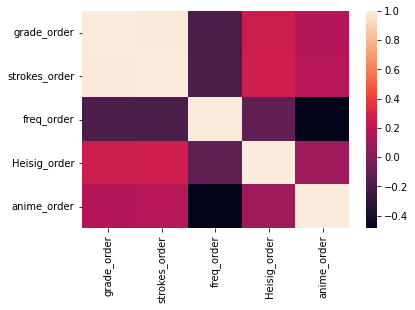

In [ ]:
import seaborn as sns
sns.heatmap(kanji_order.fillna(np.inf).corr())

Sem levar em consideração a correlação entre grade_order e strokes_order (que já era esperada pois os anos escolares ordenam Kanjis do mesmo ano por número de traços), não é possível encontrar associações muito evidentes. Algo que chama atenção é a correlação baixa de frequência com praticamente todas as outras ordens, o que evidencia como os Kanjis mais usados são aprendidos apenas após um longo período de estudos segundo os métodos tradicionais.

Abaixo, queremos comparar todas as ordens de 2 em 2. Para cada Kanji, pegamos a diferença absoluta de posições entre cada uma das duas ordens comparadas, e criamos a tabela `ranking_dif`. 

In [ ]:
import itertools

ranking_dif = kanji_order[['Kanji']]

for i in itertools.combinations([c for c in kanji_order.columns if c != 'Kanji'], 2): 
  nome = str(i[0].split('_')[0] + '_' + i[1].split('_')[0])
  col = (kanji_order[i[0]].fillna(0) - kanji_order[i[1]].fillna(0)).apply(np.abs)
  ranking_dif[nome] = col

ranking_dif.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Kanji,grade_strokes,grade_freq,grade_Heisig,grade_anime,strokes_freq,strokes_Heisig,strokes_anime,freq_Heisig,freq_anime,Heisig_anime
0,一,0,2124,0,20,2124,0,20,2124,2104,20
1,乙,0,258,73,696,258,73,696,185,438,623
2,人,6,2131,1020,8,2125,1014,2,1111,2123,1012
3,九,10,1404,5,4,1394,5,14,1399,1408,9
4,了,7,1422,96,503,1415,89,496,1326,919,407


Dessa forma, podemos ver a diferença média entre cada par de ordenações.

In [ ]:
pd.DataFrame(ranking_dif.mean(), columns=['mean']).sort_values(by='mean')

,mean
grade_strokes,55.360187
strokes_Heisig,602.456206
grade_Heisig,603.068852
freq_Heisig,760.357845
grade_freq,784.721311
strokes_freq,787.925995
freq_anime,816.974239
strokes_anime,844.408431
grade_anime,845.099766
Heisig_anime,871.827635


Como já era de se esperar, o par que apresenta a menor diferença média de posições é o grade e strokes. Em seguida, vemos que a ordem de Heisig se aproxima na mesma medida das ordens de strokes e grade. Outro aspecto da tabela que chama a atenção é que todas as ordens diferem em muitas posições da ordem de frequência do anime. Isso sugere o que já havíamos observado, que os Kanji mais "úteis" para entender o conteúdo do anime são aprendidos apenas após um longo período de estudos.

Abaixo, temos as mesmas informações plotadas num histograma.

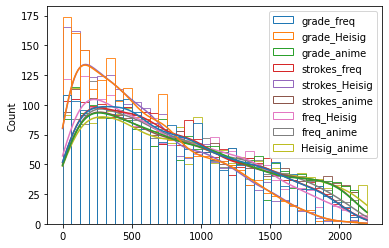

In [ ]:
sns.histplot(ranking_dif[[c for c in ranking_dif.columns if c != 'grade_strokes']], kde=True, fill=False)

# Modelo de regressão

Agora que já temos uma noção de como as ordens se comportam, podemos criar um modelo de regressão para "prever" a ordem de Heisig. As *features* escolhidas para compor o modelo estão na lista abaixo. Elas foram selecionadas por puro achismo.

In [ ]:
anime_freq = pd.DataFrame(Counter(kanji_subs).most_common(len(kanji_subs)), columns=['Kanji', 'anime_freq'])
data = pd.merge(pd.merge(kanji_database, heisig_order, on='Kanji'), anime_freq, on='Kanji', how='left').fillna(0)

features = ['Strokes', 'Grade', 'Radical Freq.', 'On Ratio with Proper Nouns', 'Left Entropy', 'Right Entropy']

Abaixo, dividimos o conjunto de dados em treinamento e teste, e criamos um modelo de regressão linear múltipla (porque usa mais de uma variável para prever a variável resposta). Utilizamos a implementação do ElasticNet, um método que aplica a regularização L1 e L2 (saiba mais [aqui](https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/video-lecture) sobre regularização).

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = data[features]
y = data['Heisig_order']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

pipe = Pipeline(steps=[
                       ('Scaler', StandardScaler()),
                       ('ElasticNet', ElasticNet(random_state=42))
])

pipe.fit(x_train, y_train)
preds = pipe.predict(x_test)
print(mean_absolute_error(y_test, preds))

537.6350214114104


Nosso modelo não fica tão bom - em média, ele erra a previsão em 537 posições. No entanto, basta termos os coeficientes da regressão linear para utilizá-los na criação da nossa ordem de estudos personalizada.

In [ ]:
coefs = pipe['ElasticNet'].coef_
coefs

array([ 94.6893711 ,  59.35093946, -45.28966152,   6.53698906,
        -6.83900388, -19.02182782])

Por fim, o que falta é apenas utilizar estes coeficientes e aplicá-los nos Kanji. No entanto, ao invés de utilizar a frequência absoluta no idioma, trocaremos essa *feature* pela frequência no anime. Dessa forma, podemos levar em consideração a relevância.

In [ ]:
import numpy as np

new_features = ['Strokes', 'Grade', 'anime_freq', 'On Ratio with Proper Nouns', 'Left Entropy', 'Right Entropy']
data_norm = pd.DataFrame(StandardScaler().fit_transform(data[new_features]), columns=new_features)

for f in new_features:
  if f == 'anime_freq':
    data_norm[f] *= coefs[features.index('Radical Freq.')]
    continue
  data_norm[f] *= coefs[features.index(f)]

data_norm['Kanji importance'] = data_norm[new_features].sum(axis=1)
data_norm['Kanji'] = data['Kanji']

data_norm[['Kanji', 'Kanji importance']].sort_values(by='Kanji importance')

,Kanji,Kanji importance
1106,生,-1066.783508
759,子,-963.866966
588,公,-827.022891
1069,人,-760.992514
515,見,-684.168253
...,...,...
574,顧,339.404553
418,驚,340.709917
905,襲,344.311581
290,鑑,379.748365


## Nova ordem baseada em relevância

Nossa nova ordem está pronta!

In [ ]:
new_order = pd.DataFrame(data_norm.sort_values(by='Kanji importance')['Kanji'])
new_order['new_order'] = list(range(1, len(kanji_database)))
new_order.head()

,Kanji,new_order
1106,生,1
759,子,2
588,公,3
1069,人,4
515,見,5


Mas agora, precisamos analisá-la, para vermos se ela realmente faz sentido. Abaixo, unimos ela ao dataframe com todas as outras ordens.

In [ ]:
kanji_order = pd.merge(kanji_order, new_order, on='Kanji')
kanji_order.head()

,Kanji,grade_order,strokes_order,freq_order,Heisig_order,anime_order,new_order
0,一,1,1,2125,1,21,8
1,乙,2,2,260,75,698,334
2,人,3,9,2134,1023,11,4
3,九,4,14,1408,9,NaN,62
4,了,5,12,1427,101,508,342


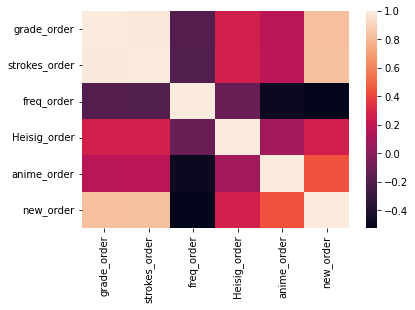

In [ ]:
sns.heatmap(kanji_order.fillna(np.inf).corr())

In [ ]:
ranking_dif = kanji_order[['Kanji']]

for i in itertools.combinations([c for c in kanji_order.columns if c != 'Kanji'], 2): 
  nome = str(i[0].split('_')[0] + '_' + i[1].split('_')[0])
  col = (kanji_order[i[0]].fillna(0) - kanji_order[i[1]].fillna(0)).apply(np.abs)
  ranking_dif[nome] = col

ranking_dif.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Kanji,grade_strokes,grade_freq,grade_Heisig,grade_anime,grade_new,strokes_freq,strokes_Heisig,strokes_anime,strokes_new,freq_Heisig,freq_anime,freq_new,Heisig_anime,Heisig_new,anime_new
0,一,0,2124,0,20,7,2124,0,20,7,2124,2104,2117,20,7,13
1,乙,0,258,73,696,332,258,73,696,332,185,438,74,623,259,364
2,人,6,2131,1020,8,1,2125,1014,2,5,1111,2123,2130,1012,1019,7
3,九,10,1404,5,4,58,1394,5,14,48,1399,1408,1346,9,53,62
4,了,7,1422,96,503,337,1415,89,496,330,1326,919,1085,407,241,166


In [ ]:
pd.DataFrame(ranking_dif.mean(), columns=['mean']).sort_values(by='mean')

,mean
grade_strokes,55.360187
strokes_new,274.516159
grade_new,279.467916
strokes_Heisig,602.456206
grade_Heisig,603.068852
Heisig_new,608.744731
freq_Heisig,760.357845
grade_freq,784.721311
strokes_freq,787.925995
freq_anime,816.974239


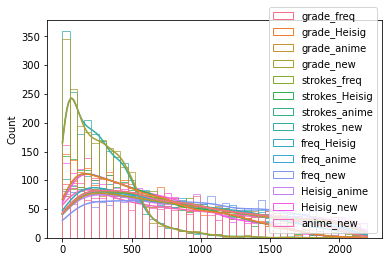

In [ ]:
sns.histplot(ranking_dif[[c for c in ranking_dif.columns if c != 'grade_strokes']], kde=True, fill=False)

In [ ]:
pd.merge(new_order, anime_order, left_on='new_order', right_on='anime_order')[:50]

,Kanji_x,new_order,Kanji_y,anime_order
0,生,1,生,1
1,子,2,子,2
2,公,3,公,3
3,人,4,君,4
4,見,5,何,5
5,何,6,見,6
6,君,7,私,7
7,一,8,僕,8
8,出,9,音,9
9,音,10,渡,10


In [ ]:
perc_anime = pd.merge(kanji_order, anime_freq, on='Kanji')

for order in [i for i in perc_anime.columns if i not in ['Kanji', 'anime_freq']]:
  perc_anime[order+'_freq'] = round(100*(np.cumsum(perc_anime.sort_values(by=order)['anime_freq'])/np.sum(perc_anime['anime_freq'])), 2)

perc_anime

,Kanji,grade_order,strokes_order,freq_order,Heisig_order,anime_order,new_order,anime_freq,grade_order_freq,strokes_order_freq,freq_order_freq,Heisig_order_freq,anime_order_freq,new_order_freq
0,一,1,1,2125,1,21,8,184,0.73,0.73,95.33,0.73,27.22,13.52
1,乙,2,2,260,75,698,334,4,0.75,0.75,0.66,7.05,95.79,65.40
2,人,3,9,2134,1023,11,4,314,1.99,2.47,99.33,54.14,18.32,7.96
3,了,5,12,1427,101,508,342,8,2.02,2.51,23.49,10.92,91.59,65.77
4,力,7,6,2074,922,204,35,28,2.13,1.17,77.43,48.68,73.20,30.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,響,2125,2125,1702,1994,218,2117,27,99.89,99.89,39.77,92.72,74.72,99.90
1219,魔,2128,2129,781,2178,297,2105,18,99.96,99.99,3.62,99.97,81.61,99.73
1220,躍,2131,2127,1344,1379,560,2127,6,99.99,99.92,20.46,69.82,93.05,99.99
1221,襲,2133,2134,1163,2181,1185,2133,1,99.99,100.00,13.61,99.98,99.85,100.00


In [ ]:
acc_freq = []

for order in [i for i in perc_anime.columns if '_order' in i and '_freq' not in i]:
  acc_freq.append(np.array(perc_anime.sort_values(by=order)[order+'_freq']))

acc_freq = pd.DataFrame(acc_freq).transpose()
acc_freq.columns = [i for i in perc_anime.columns if '_order' in i and '_freq' not in i]
acc_freq.iloc[list(range(0, min(550, len(acc_freq)), 50))]

,grade_order,strokes_order,freq_order,Heisig_order,anime_order,new_order
0,0.73,0.73,0.01,0.73,2.65,2.65
50,12.08,10.57,0.66,8.36,43.98,34.02
100,17.36,18.87,1.63,15.16,57.46,42.52
150,25.73,24.38,2.41,18.36,66.37,51.75
200,30.80,30.91,3.29,24.77,72.87,57.71
250,37.33,38.56,4.79,27.90,77.92,62.12
300,42.85,43.45,6.60,31.28,81.89,65.77
350,47.55,48.66,7.93,34.97,85.03,69.21
400,51.34,51.09,9.76,38.93,87.49,73.57
450,53.82,54.75,13.65,41.10,89.57,75.98


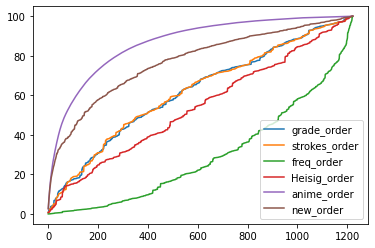

In [ ]:
limit = 357

fig = acc_freq.plot.line()

# Sugestão de frases

Com a lista de Kanjis ordenados, podemos partir para a parte interessante: as sugestões de palavras a serem estudadas, e a sugestão de uma ordem de frases que permita que o aluno estude de uma forma eficiente.

Uma das coisas que obviamente precisaremos fazer é transformar nossas legendas em conjuntos de palavras. Existem algumas ferramentas em python bem simples usadas para dividir um texto em *tokens*, mas elas funcionam principalmente criando expressões regulares que quebram, principalmente, nos espaços entre as palavras. Aí entra uma questão bem interessante de japonês: *não tem espaços*. As palavras são divididas pela estrutura gramatical da frase, e só alguém que consegue reconhecer as *partículas*, símbolos que definem as estruturas gramaticais do japonês, conseguem distinguir onde termina uma palavra e onde começa outra. Por isso, precisaremos de uma biblioteca especializada em tokenização do idioma japonês: o `nagisa`.

In [ ]:
!pip install nagisa

     |████████████████████████████████| 21.5 MB 5.2 MB/s 
     |████████████████████████████████| 4.4 MB 44.3 MB/s 


A seguir, como nossas legendas são bem bagunçadas, precisamos dar uma limpada para aplicar o algoritmo de tokenização do nagisa.

In [ ]:
import re
import nagisa

def clean_subs(subs):
  patterns = ['-->', '\r\n\r\n\d+\r\n', '\d\d:\d\d:\d\d,\d\d\d', '→\W+']
  for pattern in patterns:
    subs = re.sub(pattern, '', subs)
  return subs

def sentence_split(subs):
  return re.split('[\r\s]*\n[\r\s]*', subs)

def tokenize_jp(doc):
    doc = nagisa.tagging(doc)
    return doc.words

sent_words = []
for sub_index in range(len(subs)):
  for s in sentence_split(clean_subs(subs[sub_index])):
    sent = [i for i in tokenize_jp(s) if i not in ['', '\u3000'] and not i.isnumeric()]
    if len(sent) > 0: sent_words.append(sent)

sent_words[:4]

[['(', 'かをり', ')', 'ん', '?', 'うん', '?'],
 ['(', '鳴き声', ')'],
 ['あっ', '...', 'ウフフフ', '。'],
 ['フフフフ', '...', '。']]

E vemos acima que ele funciona! Não retiramos as pontuações porque elas são importantes para o entendimento da frase. Como vamos sugerir as frases inteiras ao estudante, não podemos retirar.

Abaixo, vamos fazer uma pesquisa no nosso dataframe de frases que contêm palavras que contêm o kanji pesquisado. Demora um pouco mas vale a pena.

In [ ]:
kanji = '生'

lookup = pd.DataFrame()
lookup['lookup'] = sent_words

lookup[lookup['lookup'].apply(lambda a: sum([kanji in i for i in a]) > 0)]['lookup'].apply(lambda a: ' '.join(a))

25                   ( 生徒 ) バイバーイ !
28                     ( 公生 ) う~ん 。
30             ( 公生 ) い ... 痛 ... 。
31               ( 椿 ) な~ん だ 公生 か 。
33          ( 公生 ) あれ ? 椿 いつ ここ に ?
                    ...            
10629        瀬戸 先生 の 大 ファン な ん です 。
10635    学校 の 先生 に も 悪い し な ~ 。 じゃあ
10644             公生 が 弾い た 曲 ... 》
10666            ( 凪 ) 憧れ の 瀬戸 先生 に
10670                   ( 紘子 ) 公生 。
Name: lookup, Length: 651, dtype: object

Agora vem a parte interessante. E demorada...

Uma regra de ouro para quem está utilizando um sistema de repetição espaçada para aprender qualquer coisa, ou seja, o método de *flashcards*, é ter sempre um foco por cartão. Em idiomas, isso quer dizer ter apenas uma palavra nova naquela frase que você ainda não sabe. No começo isso é difícil, porque você não conhece a maioria das palavras, então é até aceitável ter no máximo 2 focos em alguns cartões. Mais do que isso, no entanto, fica muito difícil criar associações e lembrar delas depois de uma sessão de estudos. Dessa forma, um dos grandes trabalhos de quem cria esses deques de flashcards é criar as frases numa ordem de dependência, em que a frase pode ter no máximo 2 pontos novos, mas as frases subsequentes podem conter as palavras estudadas anteriormente. Isso até ajuda a reforçar o aprendizado, porque você acaba criando cada vez mais conexões entre os cartões do deque.

Essa lógica foi meio longa, mas ela é essencial para entender como isso foi implementado no código abaixo. Criamos uma matriz com a seguinte forma: nas linhas, temos cada uma das frases do anime. Nas colunas, temos cada Kanji distinto. Para cada frase, nosso trabalho é procurar o Kanji da coluna analisada, e caso ele não esteja na frase, o valor desta posição é 0. Caso ele esteja na frase, o valor desta posição será *o valor da ordem do Kanji*, ou seja, pegaremos o valor do Kanji na ordem de estudos sugerida e atribuiremos este valor à posição analisada.

OBS.: Se foi confuso, pode colocar a célula abaixo para rodar, e depois voltar para reler. Mesmo que demore para entender, pode ter certeza que a célula vai demorar mais para rodar. Pode ir assistir um filminho e depois voltar. (~15 min)

In [ ]:
matriz_frases = np.zeros((len(anime_freq), len(sent_words)))

def in_str(str1, str2): return str1 in str2
in_str_vec = np.vectorize(in_str)

def matriz_coluna(kanji_index):
  matriz_frases[kanji_index] = lookup['lookup'].apply(lambda a: kanji_index+1 if np.sum(in_str_vec([anime_freq['Kanji'][kanji_index]]*len(a), a)) > 0 else 0)
  print('|', end='')

matriz_coluna_vec = np.vectorize(matriz_coluna)
print('|'*len(anime_freq))
matriz_coluna_vec(list(range(len(anime_freq))))

matriz_frases

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Com essa matriz em mãos, podemos aplicar a lógica dos criadores dos deques de flashcards. 

Primeiramente, vamos atribuir um *score* de dificuldade para cada frase do anime. Esse score vai ser simplesmente a soma do vetor da frase, ou seja, a soma das ordens de todos os Kanji que ela possui. A interpretação desse indicador é intuitiva: uma frase com um score de 1 possui com certeza apenas o primeiro Kanji, então ela é a frase ideal para os primeiros cartões. No entanto, uma frase com um score 3 pode ter apenas o Kanji 3, ou pode ter os Kanji 1 e 2. Qual delas vem primeiro, então?

Por isso, não poderemos apenas fazer uma simples ordenação por score. A lógica que vamos aplicar é simplesmente percorrer cada uma das colunas, sequencialmente, e escolher uma frase que contenha o Kanji da coluna. Assim, além de garantir que todos os Kanji aparecerão no deque pelo menos uma vez, conseguimos garantir que o Kanji 1 aparecerá na frase 1, o Kanji 2 aparecerá na frase 2, e assim por diante.

Mas qual frase vamos escolher? De acordo com a lógica dos criadores do deque, temos que escolher preferencialmente uma carta que tem apenas um foco. Podemos assumir que, se estamos no Kanji X, é só escolher a frase com o score X. Mas e se, por exemplo, nenhuma frase tiver o score exatamente X, mas tiver o score X + (X - 1)? Isso quer dizer que a frase possui um kanji novo, mas também tem um kanji anteriormente apresentado, o que é "permitido" na lógica dos criadores do deque. E se o score for X + (X + 1), ou seja, tem 2 Kanjis novos? Não é o ideal, mas também é aceitável na lógica que estamos seguindo.

Para simplificar essa lógica toda, vamos usar uma heurística que vai funcionar na maioria das vezes: selecionar a frase com o score minimo na coluna. Dessa forma, sabemos que ela terá pelo menos o Kanji apresentado. Não conseguiremos garantir o máximo, e por isso pode ser que tenhamos algumas frases com mais de 2 focos. Mas é a vida.

In [ ]:
scores = np.sum(matriz_frases, axis=0)

for kanji_index in range(150):
  print(' '.join(np.array(lookup.iloc[matriz_frases[kanji_index].nonzero()[0][np.argmin(np.where(scores[matriz_frases[kanji_index].nonzero()[0]] > kanji_index, scores[matriz_frases[kanji_index].nonzero()[0]], np.inf))]])[0]))

生まれ た とき から
その 子
( 公生 ) う~ん 。
君 は どう だっ た ?
何 か ある とき は
カラフル に 見え てる ん だろう な 》
( 椿 ) 私 も ~ 。
《 で も ... 僕 に は ... 》
[ TEL ] ( シャッター 音 )
( 渡 ) ま~ た やっ た の か あいつ 。
だ から 人 は
しっかり 弾け てる 。
メロディー を 奏 で だす 》
あれ って 有馬 だ よ な ?
それ に じゃ じゃ 馬 の
ピアノ の コンクール に 出 て 。
( 観客 ) あっ ありがとう 。
( 観客 ) あっ ありがとう 。
ただいま 母 さん 。
演奏 できる ん だろう 》
一人 で
( 武士 ) ふん っ !
気 に し ない で ください 。
《 絵 に なる な 》
( 椿 ) まだ 分かん ない ん だ 。
( 武士 ) ふん っ !
椿 ちゃん が 言っ て た 。
私 に 合わせ て よ !
ピアニスト の 手 だ 。
あっ と いう 間 に ... 。
うん 。 そう ! よく ない と 思う !
ずっと 楽 な の に >
はっ さて は お前
[ マイク ] ( アナウンス ) ただ 今 より
( 女の子 ) あっ あの ... 。
早く し て よ のろま 。
えっ ? 椿 ダイエット 中 じゃ ない の ?
すぐ 行か なく ちゃ 。
えっ ? 大した こと じゃ ない よ 。
目 を つぶっ て しまう 》
ちっとも 変わら ない ん だ から 。
ハト 来 ない よ ~ 。
( 柏木 ) あんた だ って
《 この 先 は
聞け よ !
( 早希 )
ひきょう 者 !
心 ひか れる 子 に
落とさ れる わ 。
こんな 日 に 。
俺 の ピアニカ ... 。
《 『 クロイツェル 』 だ けど この 曲 は もう
これ が 好き な の 。
声 ... 。
あした 会う こと に なっ てる の 。
< ショパン を 自分 の もの に
知っ て た ん だ 。
無垢 の まま で 人 は 一人 で
小さい ころ コンクール に
テンション 上がり まくり 》 あいつ が すぐ そこ で
これ だ から 男 って !
は ~ レベル 高い な 。
《 よしっ 。 うまく 入れ た 》
じゃ